# 🎮 Video Game Sales Forecasting Project
## 🎯 Project Introduction

This project aims to analyze historical video game sales data to uncover key patterns that can help predict successful titles and inform strategic decisions for 2017. 

Using a dataset that includes user and critic ratings, platforms, genres, and regional sales figures, the analysis explores trends by year, genre, platform, and rating (ESRB), identifying what drives higher sales and how game characteristics influence success.

Through data cleaning, exploratory visualizations, user profile analysis by region, and hypothesis testing, this project develops a data-driven understanding of the video game market and provides actionable insights.


## 📁 Step 1: Loading and Initial Data Exploration


In [132]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [72]:
#Importing the dataset
dataset = pd.read_csv('games.csv')


In [136]:
dataset.sample(10) # Displaying the first 10 rows of the dataset

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6465,Jikkyou Powerful Pro Yakyuu 2013,PS3,2013,Sports,0.00,0.00,0.26,0.00,NaN,NaN,NaN,0.26
4184,World Soccer Winning Eleven 8: Liveware Evolution,PS2,2005,Sports,0.00,0.00,0.47,0.00,NaN,NaN,NaN,0.47
16601,The Land Before Time: Into the Mysterious Beyond,GBA,2006,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
13319,VR Soccer '96,PS,1996,Sports,0.03,0.02,0.00,0.00,NaN,NaN,NaN,0.05
12648,pro evolution soccer 2011,PC,2010,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN,0.06
8309,Thief: Deadly Shadows,XB,2004,Action,0.13,0.04,0.00,0.01,82.0,7.3,M,0.18
2323,Castlevania: Circle of the Moon,GBA,2001,Platform,0.60,0.22,0.05,0.02,91.0,8.5,T,0.89
324,Flash Focus: Vision Training in Minutes a Day,DS,2007,Misc,0.86,1.56,1.05,0.35,59.0,4.0,E,3.82
6989,DiRT Showdown,X360,2012,Racing,0.08,0.13,0.00,0.02,75.0,6.4,E10+,0.23
15629,Lovely x Cation 1 & 2,PSV,2015,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02


In [74]:

dataset.info() # Displaying the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [75]:
dataset.describe() # Displaying the statistical information of the dataset

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [76]:
dataset.isnull().sum() # Displaying the null values in the dataset


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# 🧹 Step 2: Data Preparation


### Standarazing Column Names

In [77]:
dataset.columns = dataset.columns.str.lower() # Converting the column names to lower case

In [ ]:
dataset.head() # Displaying the first 5 rows of the dataset

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Handling Missing Values

In [79]:
dataset = dataset.dropna(subset=['name', 'year_of_release', 'genre']) # Dropping the null values in the specified columns

### Data Type Conversion

In [80]:

dataset['year_of_release'] = dataset['year_of_release'].astype(int) # Converting the year_of_release column to integer

In [81]:
dataset['user_score'] = dataset['user_score'].replace('tbd', np.nan) # Replacing the 'tbd' values in the user_score column with NaN
dataset['user_score'] = dataset['user_score'].astype(float) # Converting the user_score column to float

### Calculate Total Sales

In [82]:
dataset['total_sales'] = dataset['na_sales'] + dataset['eu_sales'] + dataset['jp_sales'] + dataset['other_sales'] # Creating a new column total_sales by summing the sales of all regions
dataset['total_sales'] = dataset['total_sales'].astype(float) # Converting the total_sales column to float

# 📊 Step 3: Exploratory Data Analysis


### Temporal Analysis of Game Releases

In [83]:
game_by_year = dataset.groupby('year_of_release')['name'].count() # Grouping the dataset by name and year_of_release

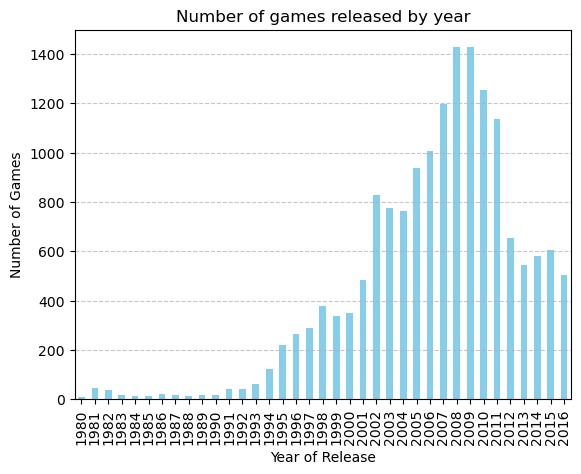

In [84]:
plt.Figure(figsize=(10, 6)) # Setting the figure size
game_by_year.plot(kind='bar', color='skyblue') # Plotting the bar chart
plt.title('Number of games released by year') # Setting the title of the plot
plt.xlabel('Year of Release') # Setting the x-axis label
plt.ylabel('Number of Games') # Setting the y-axis label    
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adding grid lines to the y-axis
plt.show() # Displaying the plot

In [85]:
stats_by_year = dataset.groupby('year_of_release').agg({'name': 'count',
                                                        'total_sales': ['sum', 'mean', 'median'],
                                                        'user_score': 'mean',
                                                        'critic_score': 'mean'}) # Grouping the dataset by year_of_release and calculating the statistics

In [86]:
stats_by_year.columns = ['total_games', 'total_sales_sum', 'total_sales_mean', 'total_sales_median', 'user_score_mean', 'critic_score_mean'] # Renaming the columns of the stats_by_year dataframe
stats_by_year = stats_by_year.reset_index() # Resetting the index of the stats_by_year dataframe


In [87]:
stats_by_year.head(37) # Displaying 37 rows of the stats_by_year dataframe

,year_of_release,total_games,total_sales_sum,total_sales_mean,total_sales_median,user_score_mean,critic_score_mean
0,1980,9,11.38,1.264444,0.770,NaN,NaN
1,1981,46,35.68,0.775652,0.465,NaN,NaN
2,1982,36,28.88,0.802222,0.540,NaN,NaN
3,1983,17,16.80,0.988235,0.770,NaN,NaN
4,1984,14,50.35,3.596429,1.485,NaN,NaN
5,1985,14,53.95,3.853571,1.015,5.800000,59.000000
6,1986,21,37.08,1.765714,1.360,NaN,NaN
7,1987,16,21.70,1.356250,0.885,NaN,NaN
8,1988,15,47.21,3.147333,1.510,2.200000,64.000000
9,1989,17,73.45,4.320588,1.610,NaN,NaN


### Platform Sales Analysis Over Time

In [88]:
sales_overtime = dataset.groupby('total_sales')[['platform', 'year_of_release']].count() # Grouping the dataset by total_sales and counting the number of platforms and year_of_release
sales_overtime = sales_overtime.reset_index() # Resetting the index of the sales_overtime dataframe

<Figure size 1400x800 with 0 Axes>

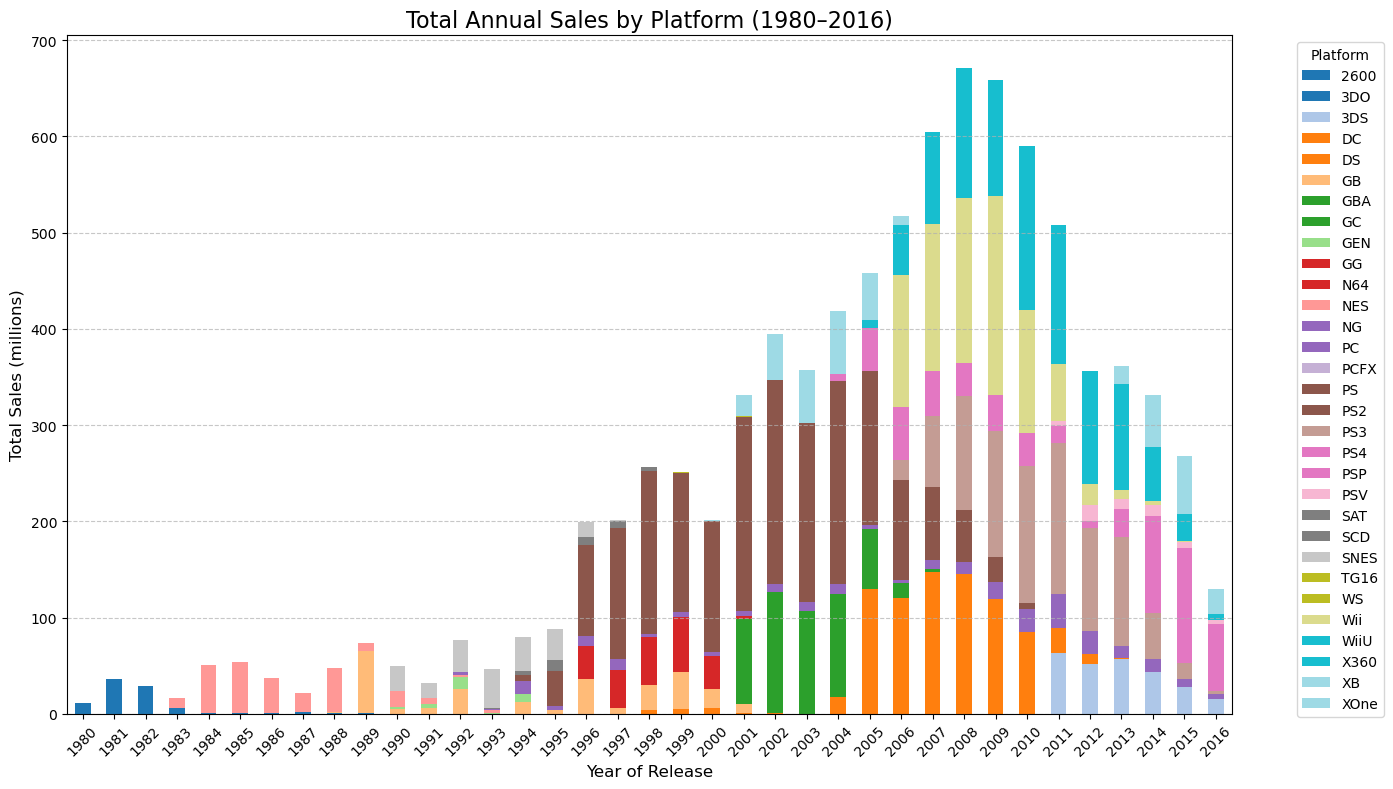

In [89]:
# Create a bar chart with unique colors for each platform
plt.figure(figsize=(14, 8))  # Set the figure size

# Group data by year of release and platform, then sum total sales
annual_sales_by_platform = dataset.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a stacked bar chart
annual_sales_by_platform.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Customize the chart
plt.title('Total Annual Sales by Platform (1980–2016)', fontsize=16)  # Chart title
plt.xlabel('Year of Release', fontsize=12)  # X-axis label
plt.ylabel('Total Sales (millions)', fontsize=12)  # Y-axis label
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend with platform colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the Y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the chart

<Figure size 1200x600 with 0 Axes>

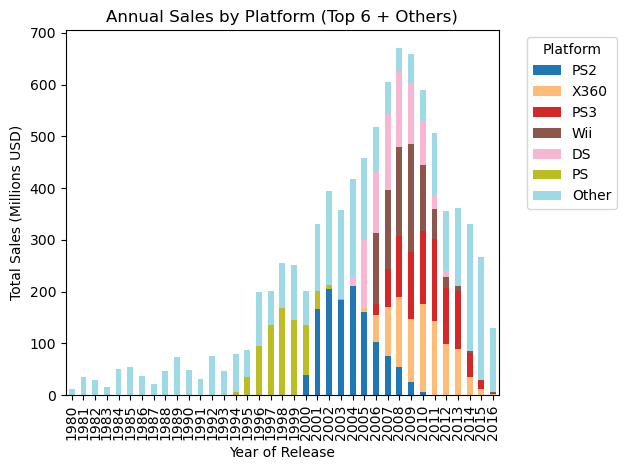

In [90]:
# Group and pivot total sales by year and platform
sales_by_platform = dataset.groupby(
    ['year_of_release', 'platform']
)['total_sales'].sum().unstack(fill_value=0)

# Select the top 6 platforms by overall sales
top_platforms = sales_by_platform.sum().nlargest(6).index

# Build a DataFrame containing only the top 6, and group all others as “Other”
df_top = sales_by_platform[top_platforms].copy()
df_top['Other'] = sales_by_platform.drop(columns=top_platforms).sum(axis=1)



# Create a stacked bar chart
plt.figure(figsize=(12, 6))
df_top.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    legend=False  # disable default legend so we can customize it
)

# Place legend outside the plot
plt.legend(
    df_top.columns,
    title='Platform',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Label axes and add title 
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions USD)')
plt.title('Annual Sales by Platform (Top 6 + Others)')

# Adjust layout and display
plt.tight_layout()
plt.show()




The video game industry underwent significant growth and transformation from 1980 to 2015. Initially stable in both game releases and sales from 1980 to 1995, the industry saw a dramatic surge starting in 1996 with the PlayStation's launch, which doubled production and sales figures and initiated a sustained upward trend. This growth peaked in 2009, fueled by popular consoles like the Wii, Xbox 360, PS2, PS3, and others. However, post-2010, the rise of free-to-play and online gaming models led to a decline in traditional game production and sales. Despite this shift, newer consoles like the PlayStation 4 have maintained relatively high sales, with the PlayStation platform consistently achieving greater sales compared to other platforms, demonstrating the industry's resilience and ability to adapt to evolving market dynamics.

Overall, mainstream consoles tend to follow an 8–10 year commercial lifecycle—about 6–8 years to peak and another 3–5 years of decline. Platforms with strong innovation (e.g., PS1, PS2, Xbox 360) enjoy longer peak periods, while others see quicker rises and falls.

For marketing or major title releases, targeting the window 3–7 years post‑launch maximizes visibility and sales.






## Determining Relevant Time Period

In [91]:
relevant_years = list(range(1996, 2016))  # Years from 1996 to 2016 inclusive
# Filter the dataset and explicitly create a copy
dataset_relevant = dataset[dataset['year_of_release'].isin(relevant_years)].copy()

# Convert 'year_of_release' to integer
dataset_relevant['year_of_release'] = dataset_relevant['year_of_release'].astype(int)

From 1980 to 1995, both game releases and sales were relatively low and stable, reflecting the nascent stage of the industry and sparse recording of review data.
- The 1996 launch of the PlayStation doubled annual releases and sales compared to 1995, marking the beginning of sustained growth and richer data availability.
- Data from 1996 through 2015 are complete and consistent across all platforms, ensuring reliable trend analysis.
- The 2016 dataset is incomplete (partial year), so excluding it from the main analysis avoids bias and preserves comparability

## Platform Performance Analysis

In [92]:
data_platform = dataset_relevant.groupby('platform')['total_sales'].agg(['mean', 'median', 'sum']).reset_index() # Group by platform and calculate mean, median, and sum
data_platform = data_platform.sort_values(by='sum', ascending=False) # Sort by total sales (sum) in descending order
data_platform.columns = ['platform', 'mean_sales', 'median_sales', 'total_sales'] # Rename the columns
data_platform['mean_sales'] = data_platform['mean_sales'].round(2) # Round the mean sales to 2 decimal places
data_platform.head(10) # Display the first 10 rows of the data_platform dataframe

,platform,mean_sales,median_sales,total_sales
11,PS2,0.58,0.23,1233.56
21,X360,0.79,0.28,959.72
12,PS3,0.73,0.29,927.74
19,Wii,0.69,0.19,891.00
2,DS,0.38,0.11,802.76
10,PS,0.64,0.27,685.59
4,GBA,0.39,0.16,312.88
14,PSP,0.24,0.09,289.53
22,XB,0.31,0.15,251.57
13,PS4,1.07,0.31,244.89


In [93]:
data_platform_yearly = dataset_relevant.groupby(['year_of_release', 'platform'])['total_sales'].agg(['mean', 'median', 'sum']).reset_index() # Group by year and platform and calculate mean, median, and sum
data_platform_yearly = data_platform_yearly.sort_values(by='sum', ascending=False) # Sort by total sales (sum) in descending order
data_platform_yearly.columns = ['year_of_release', 'platform', 'mean_sales', 'median_sales', 'total_sales'] # Rename the columns
data_platform_yearly['mean_sales'] = data_platform_yearly['mean_sales'].round(2) # Round the mean sales to 2 decimal places


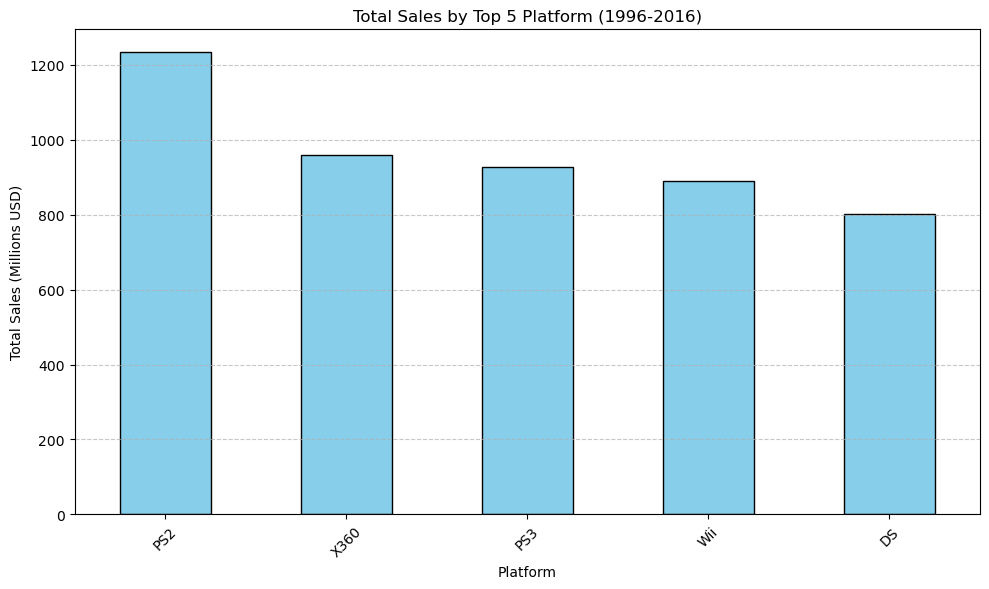

In [94]:
annual_sales = data_platform_yearly.groupby(['year_of_release', 'platform'])['total_sales'] \
                 .sum() \
                 .unstack(fill_value=0)

plt.figure(figsize=(10, 6))  # Set the figure size
total_by_platform = annual_sales.sum().sort_values(ascending=False)
total_by_platform.head(5).plot(kind='bar',
                               color='skyblue', 
                            edgecolor='black')  # Plot the top 5 platforms
plt.title('Total Sales by Top 5 Platform (1996-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

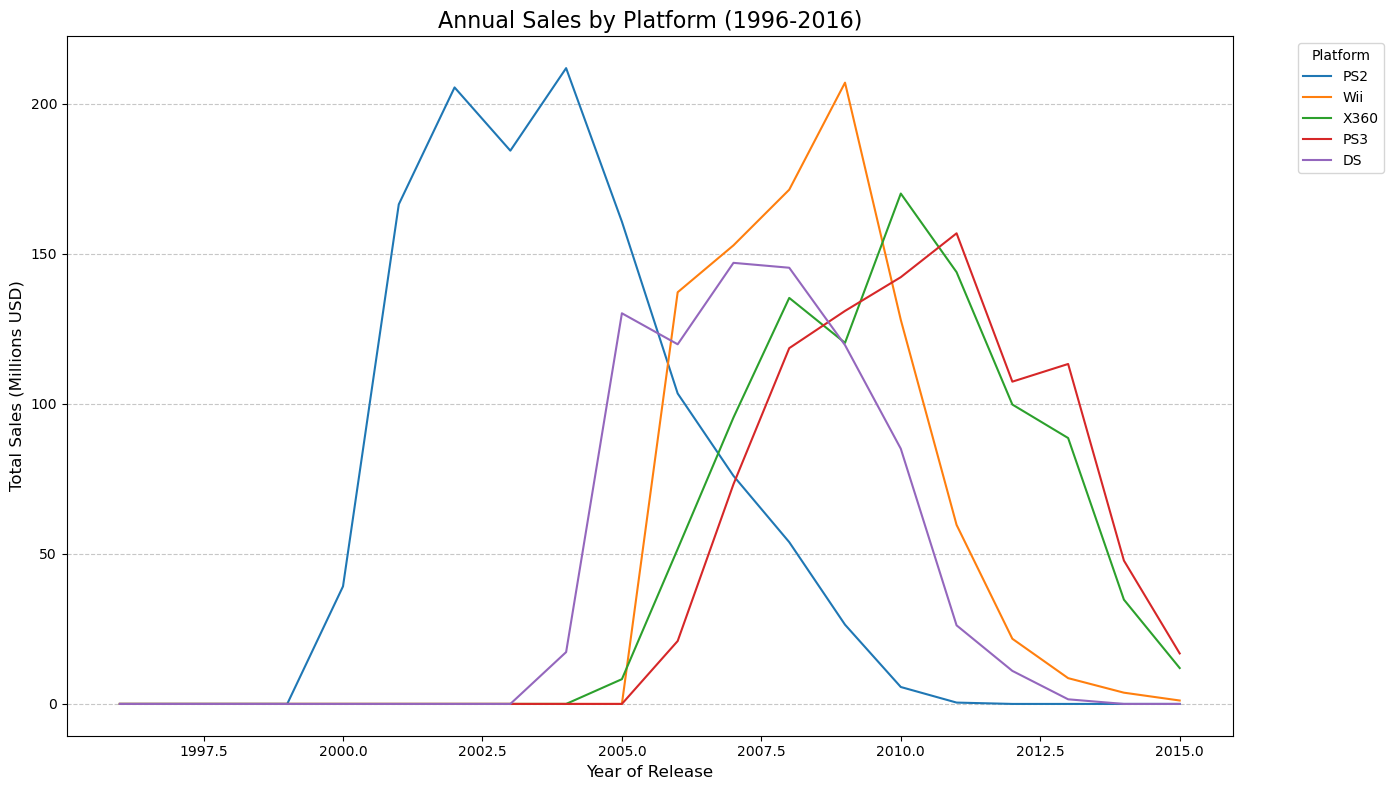

In [95]:
# Ensure the correct DataFrame is used for plotting

annual_sales[['PS2', 'Wii', 'X360', 'PS3', 'DS']].plot(kind='line', figsize=(14, 8))
# Plot the annual sales for the top 5 platforms

# Customize the plot
plt.title('Annual Sales by Platform (1996-2016)', fontsize=16)  # Set the title of the plot  
plt.xlabel('Year of Release', fontsize=12)  # Set the x-axis label
plt.ylabel('Total Sales (Millions USD)', fontsize=12)  # Set the y-axis label    
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add a legend with platform colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

In summary, our analysis of global game sales from 1996 to 2015 reveals that the PlayStation 2, Nintendo DS, PlayStation 3, Wii, and Xbox 360 consistently led the market in total revenue. These platforms each followed a clear lifecycle—reaching peak annual sales roughly 5–8 years after launch before entering a multi‑year decline. By focusing on the 3–7 year window post‑launch, we identify the optimal period for marketing and new title releases, when a platform’s user base and sales momentum are highest. This insight allows us to target campaigns most effectively on the consoles that not only command the largest revenues but also demonstrate sustained growth during their prime years.

## Sales Distribution Analysis

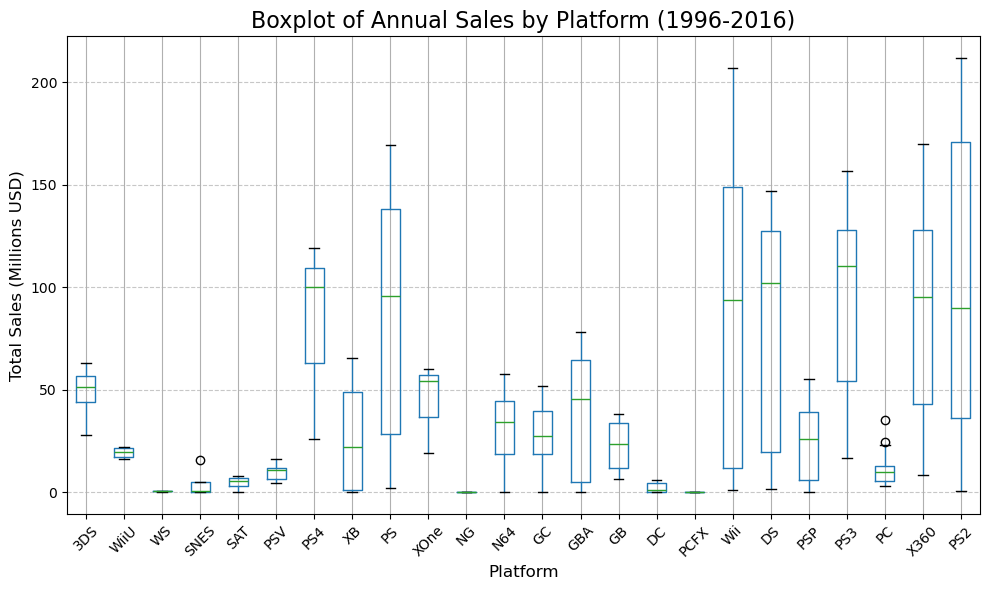

In [96]:
annual_sales_filtered = annual_sales.replace(0, np.nan)  # Replace 0 with NaN for better visualization
order= annual_sales.median().sort_values().index  # Get the order of platforms based on median sales

annual_sales_filtered[order].boxplot(figsize=(10,6))   # Create a boxplot for annual sales by platform     
plt.title('Boxplot of Annual Sales by Platform (1996-2016)', fontsize=16)  # Set the title of the plot
plt.xlabel('Platform', fontsize=12)  # Set the x-axis label
plt.ylabel('Total Sales (Millions USD)', fontsize=12)  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot


In [97]:
platform_stats = (
    dataset_relevant
      .groupby('platform')['total_sales']
      .agg(['count','mean', 'median', 'sum', 'min', 'max', 'var', 'std'])
      .reset_index()
)

# Rename the columns for clarity
platform_stats.columns = [
    'platform', 'n_years', 'mean_sales', 'median_sales',
    'total_sales', 'min_sales', 'max_sales',
    'variance_sales', 'std_sales'
]

# Rounding the mean_sales to 2 decimal places
platform_stats = platform_stats.round(2)

# Sorting the DataFrame by mean_sales in descending order
platform_stats.sort_values('mean_sales', ascending=False).head(10)

,platform,n_years,mean_sales,median_sales,total_sales,min_sales,max_sales,variance_sales,std_sales
3,GB,60,2.27,0.86,136.30,0.07,31.38,27.14,5.21
13,PS4,228,1.07,0.31,244.89,0.01,14.63,3.61,1.90
23,XOne,160,0.83,0.35,133.17,0.01,7.39,1.40,1.18
21,X360,1219,0.79,0.28,959.72,0.01,21.82,2.69,1.64
12,PS3,1268,0.73,0.29,927.74,0.00,21.05,2.02,1.42
6,N64,316,0.69,0.27,218.01,0.01,11.90,1.75,1.32
19,Wii,1285,0.69,0.19,891.00,0.01,82.54,10.02,3.17
10,PS,1074,0.64,0.27,685.59,0.01,10.95,1.19,1.09
20,WiiU,133,0.58,0.22,77.59,0.01,7.09,1.22,1.11
11,PS2,2127,0.58,0.23,1233.56,0.00,20.81,1.30,1.14


## Review Score Impact Analysis

In [98]:
# Choose a specific platform'PS2'
platform = 'PS2'

# Filter the dataset for the chosen platform
platform_data = dataset_relevant[dataset_relevant['platform'] == platform]







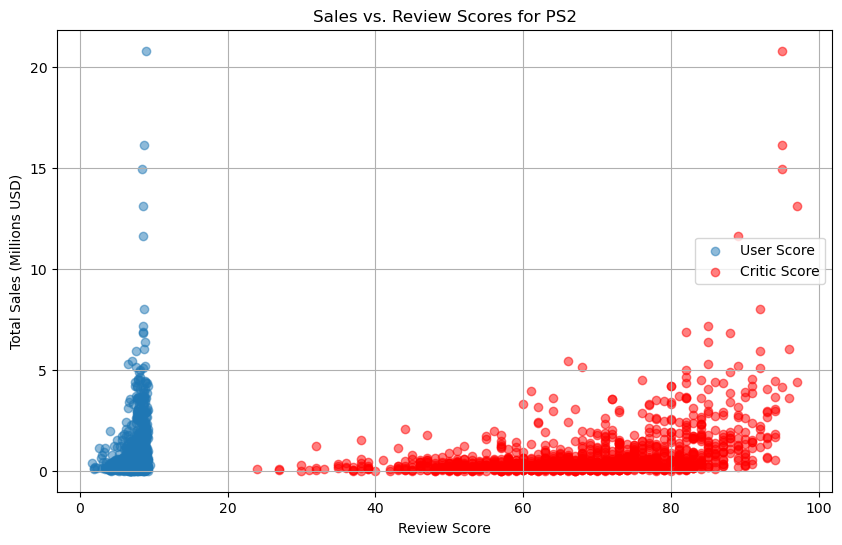

In [99]:
# Create a scatter plot for user scores vs. total sales
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5, label='User Score')
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5, label='Critic Score', color='red')
plt.title(f'Sales vs. Review Scores for {platform}')
plt.xlabel('Review Score')
plt.ylabel('Total Sales (Millions USD)')
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# Calculate the correlation between review scores and total sales
user_score_corr = platform_data['user_score'].corr(platform_data['total_sales'])
critic_score_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

# Display the correlation results
print(f'Correlation between User Score and Total Sales for {platform}: {user_score_corr:.2f}')
print(f'Correlation between Critic Score and Total Sales for {platform}: {critic_score_corr:.2f}')

Correlation between User Score and Total Sales for PS2: 0.18
Correlation between Critic Score and Total Sales for PS2: 0.39


In summary, the correlation between critic scores and sales is significantly higher than that of user scores—0.39 versus 0.18 on the PlayStation 2—indicating that professional reviews have greater predictive power for commercial success. While player opinions remain valuable, they exert a much weaker influence on sales. Therefore, to anticipate and maximize performance, it is advisable to place particular emphasis on expert critical reviews.

## Cross-Platform Comparison

In [101]:
# Número de plataformas por juego
platform_counts = dataset_relevant.groupby('name')['platform'] \
                                  .nunique()

# Juegos que salieron en 2 o más plataformas
multi = platform_counts[platform_counts > 1].index

# Conjunto filtrado
df_multi = dataset_relevant[dataset_relevant['name'].isin(multi)]


In [102]:
sales_pivot = df_multi.pivot_table(
    index='name',
    columns='platform',
    values='total_sales',
    fill_value=0
)


In [103]:
top_multi = sales_pivot.sum(axis=1).nlargest(5).index
sales_top = sales_pivot.loc[top_multi]


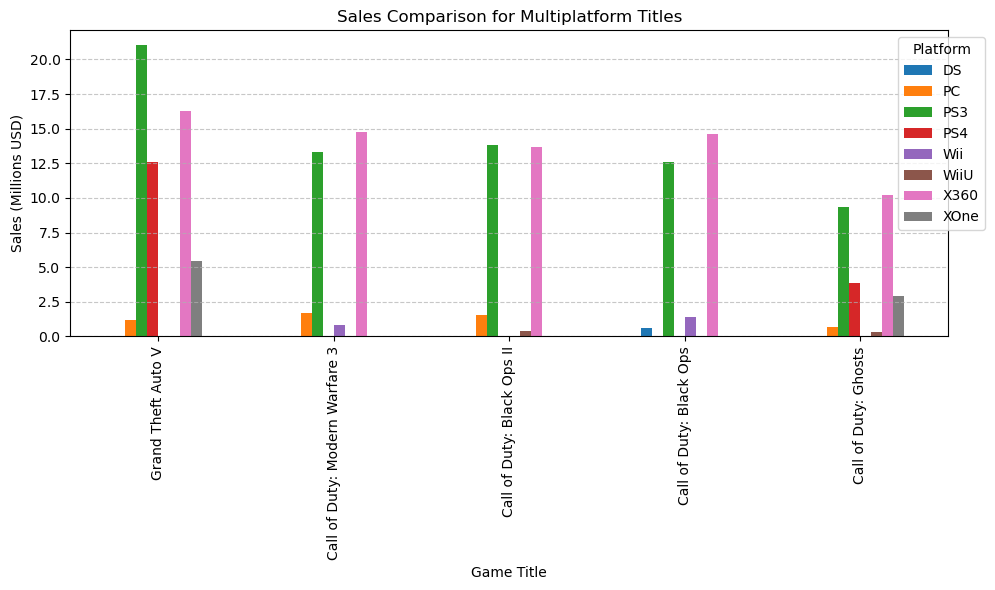

In [104]:
valid_platforms = sales_top.columns[(sales_top > 0).any()] # Filter for valid platforms

sales_top[valid_platforms].plot(
    kind='bar',
    figsize=(10,6)
)
plt.xlabel('Game Title')
plt.ylabel('Sales (Millions USD)')
plt.title('Sales Comparison for Multiplatform Titles')
plt.legend(title='Platform', bbox_to_anchor=(1.05,1))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.tight_layout()
plt.show()


## Genre Analysis

In [105]:
data_genre = (
    dataset_relevant
      .groupby('genre')
      .agg(
        total_sales_sum=('total_sales','sum'),
        total_games_count=('name','count')
      )
      .reset_index()
      .sort_values('total_sales_sum', ascending=False)
) # Group by genre and calculate total sales and game count
data_genre.columns = ['genre', 'total_sales_sum', 'total_games_count'] # Rename the columns




In [106]:
data_genre['avg_sales_per_game'] = (
    data_genre['total_sales_sum'] / data_genre['total_games_count']
).round(2) # Calculate average sales per game
data_genre['avg_sales_per_game'] = data_genre['avg_sales_per_game'].fillna(0) # Fill NaN values with 0
data_genre.head(10)

,genre,total_sales_sum,total_games_count,avg_sales_per_game
0,Action,1611.38,3036,0.53
10,Sports,1226.85,2161,0.57
8,Shooter,925.57,1171,0.79
7,Role-Playing,856.02,1356,0.63
3,Misc,764.67,1647,0.46
6,Racing,683.53,1167,0.59
4,Platform,591.91,780,0.76
2,Fighting,383.26,747,0.51
9,Simulation,373.06,810,0.46
1,Adventure,205.72,1211,0.17


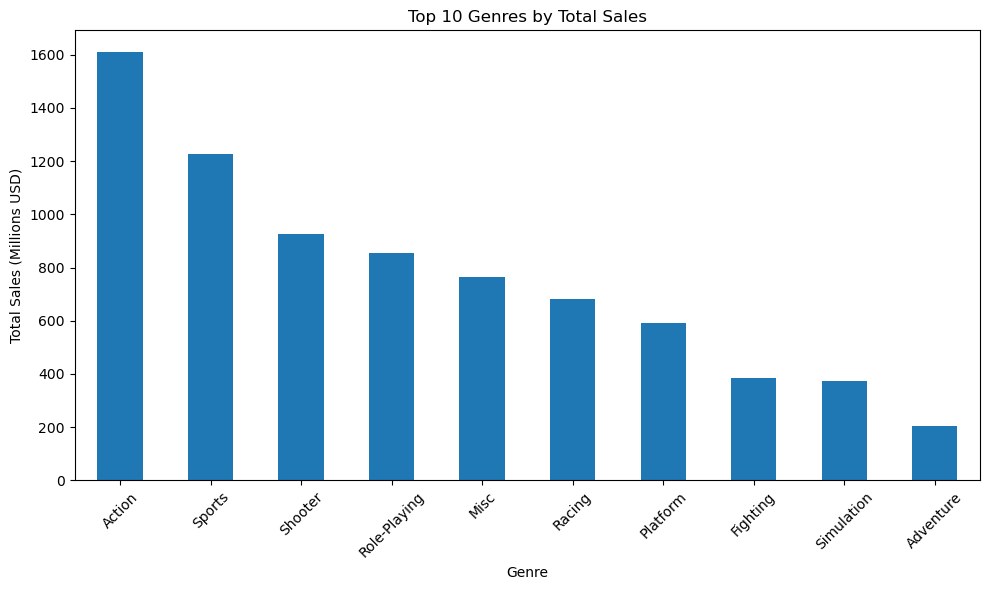

In [107]:
data_genre.head(10).plot(
  kind='bar', x='genre', y='total_sales_sum',
  legend=False, figsize=(10,6)
)
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions USD)')
plt.title('Top 10 Genres by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [108]:
# Calculate the correlation between review scores and total sales
genre_games_sales_corr = data_genre['total_games_count'].corr(data_genre['total_sales_sum'])


# Display the correlation results
print(f'Correlation between Total games count and Total sales : {genre_games_sales_corr:.2f}')


Correlation between Total games count and Total sales : 0.91


Action and Sports dominate total sales largely because they have the highest number of releases (3,036 and 2,161 titles respectively), and there’s a very strong correlation (≈0.92) between game count and aggregate revenue. However, genres like Shooter (0.79 M per game) and Platform (0.76 M per game) deliver substantially higher sales on a per-title basis despite fewer releases. This suggests that while mass-market genres drive volume, niche or premium genres can yield superior ROI per game. Consequently, a balanced portfolio—leveraging the broad audience of Action/Sports alongside strategically targeted, high-impact releases in genres such as Shooter, Platform, and RPG—offers the optimal path to maximize both total revenue and average per-title performance.

# 🌍 Step 4: User Profiles by Region


### Regional Platform Analysis

In [109]:
#  Top 5 Platforms per Region
top_5_platforms_jp = dataset.groupby('platform')['jp_sales'].sum()
top_5_platforms_eu = dataset.groupby('platform')['eu_sales'].sum()
top_5_platforms_na = dataset.groupby('platform')['na_sales'].sum()

#  Cross-Regional Platform Comparison
top_5_platforms = pd.DataFrame({
    'jp_platform': top_5_platforms_jp,
    'eu_platform': top_5_platforms_eu,
    'na_platform': top_5_platforms_na
}).reset_index()

top_5_platforms = top_5_platforms.fillna(0)  # Fill NaN values with 0


top_5_platforms['total_sales'] = top_5_platforms['jp_platform'] + top_5_platforms['eu_platform'] + top_5_platforms['na_platform']  # Calculate total sales across regions
top_5_platforms = top_5_platforms.nlargest(5, 'total_sales')  # Get the top 5 platforms based on total sales

top_5_platforms.head(5) # Display the top 5 platforms per region


,platform,jp_platform,eu_platform,na_platform,total_sales
16,PS2,137.54,332.63,572.92,1043.09
28,X360,12.30,268.32,595.74,876.36
26,Wii,68.28,258.32,486.87,813.47
17,PS3,79.41,327.21,390.13,796.75
4,DS,175.02,188.41,380.31,743.74


In [110]:
total_jp = top_5_platforms['jp_platform'].sum()
total_eu = top_5_platforms['eu_platform'].sum()
total_na = top_5_platforms['na_platform'].sum()
top_5_platforms['japan_share (%)'] = (top_5_platforms['jp_platform'] / total_jp * 100).round(2)
top_5_platforms['europe_share (%)'] = (top_5_platforms['eu_platform'] / total_eu * 100).round(2)
top_5_platforms['north_america_share (%)'] = (top_5_platforms['na_platform'] / total_na * 100).round(2)

top_5_platforms.head(5) # Display the top 5 platforms with their shares in each region

,platform,jp_platform,eu_platform,na_platform,total_sales,japan_share (%),europe_share (%),north_america_share (%)
16,PS2,137.54,332.63,572.92,1043.09,29.11,24.19,23.62
28,X360,12.30,268.32,595.74,876.36,2.60,19.52,24.56
26,Wii,68.28,258.32,486.87,813.47,14.45,18.79,20.07
17,PS3,79.41,327.21,390.13,796.75,16.80,23.80,16.08
4,DS,175.02,188.41,380.31,743.74,37.04,13.70,15.68


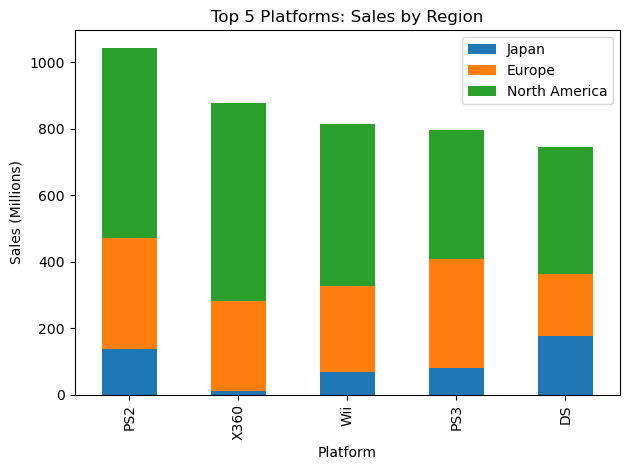

In [111]:
top_5_platforms.plot(x='platform', y=['jp_platform', 'eu_platform', 'na_platform'], kind='bar', stacked=True)
plt.title('Top 5 Platforms: Sales by Region')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.legend(['Japan', 'Europe', 'North America'])
plt.tight_layout()
plt.show()

## Regional Genre Analysis

In [112]:
# Group the dataset by genre and sum sales for each region
japan_sales_genre = dataset.groupby('genre')['jp_sales'].sum()
europe_sales_genre = dataset.groupby('genre')['eu_sales'].sum()
north_america_sales_genre = dataset.groupby('genre')['na_sales'].sum()

# Create a DataFrame combining sales from all regions
sales_by_genre = pd.DataFrame({
    'japan_sales': japan_sales_genre,
    'europe_sales': europe_sales_genre,
    'north_america_sales': north_america_sales_genre
}).reset_index()

# Replace any NaN values with 0 (for genres with no sales in a region)
sales_by_genre = sales_by_genre.fillna(0)

# Calculate total sales by summing sales across regions
sales_by_genre['total_sales'] = sales_by_genre['japan_sales'] + sales_by_genre['europe_sales'] + sales_by_genre['north_america_sales']

# Select the top 5 genres with the highest total sales
top_5_genres = sales_by_genre.nlargest(5, 'total_sales').sort_values('total_sales', ascending=False)  # Get the top 5 genres based on total sales

# Display the result
top_5_genres.head(5)  # Display the top 5 genres with the highest total sales

,genre,japan_sales,europe_sales,north_america_sales,total_sales
0,Action,160.14,510.99,863.17,1534.30
10,Sports,134.93,371.33,671.20,1177.46
8,Shooter,38.68,314.52,584.83,938.03
7,Role-Playing,353.39,188.24,330.04,871.67
4,Platform,130.71,199.39,444.44,774.54


In [113]:
total_jp = top_5_genres['japan_sales'].sum()
total_eu = top_5_genres['europe_sales'].sum()
total_na = top_5_genres['north_america_sales'].sum()
top_5_genres['japan_share (%)'] = (top_5_genres['japan_sales'] / total_jp * 100).round(2)
top_5_genres['europe_share (%)'] = (top_5_genres['europe_sales'] / total_eu * 100).round(2)
top_5_genres['north_america_share (%)'] = (top_5_genres['north_america_sales'] / total_na * 100).round(2) # Calculate share of each platform in each region
top_5_genres = top_5_genres.sort_values('total_sales', ascending=False)  # Sort by total sales in descending order

top_5_genres.head(5)  # Display the top 5 platforms with their sales and shares in each region

,genre,japan_sales,europe_sales,north_america_sales,total_sales,japan_share (%),europe_share (%),north_america_share (%)
0,Action,160.14,510.99,863.17,1534.30,19.58,32.25,29.83
10,Sports,134.93,371.33,671.20,1177.46,16.50,23.44,23.20
8,Shooter,38.68,314.52,584.83,938.03,4.73,19.85,20.21
7,Role-Playing,353.39,188.24,330.04,871.67,43.21,11.88,11.41
4,Platform,130.71,199.39,444.44,774.54,15.98,12.58,15.36


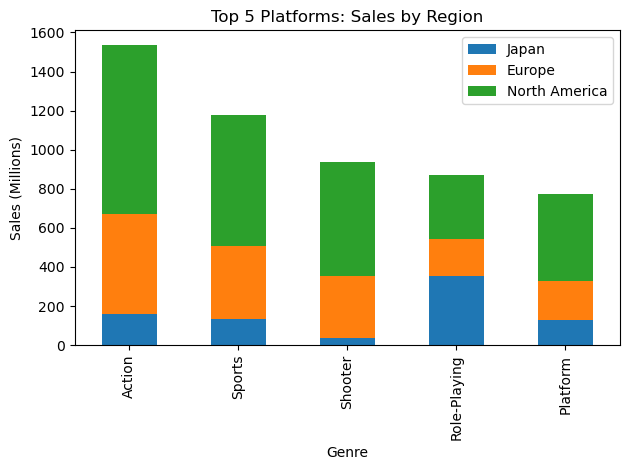

In [116]:
top_5_genres.plot(x='genre', y=['japan_sales', 'europe_sales', 'north_america_sales'], kind='bar', stacked=True)
plt.title('Top 5 Platforms: Sales by Region')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.legend(['Japan', 'Europe', 'North America'])
plt.tight_layout()
plt.show()

###  ESRB Rating Impact Analysis

In [130]:
avg_by_rating_region = (
    dataset_relevant
      .groupby('rating')[['na_sales','eu_sales','jp_sales']]
      .mean()       
      .reset_index()
      )
avg_by_rating_region.columns = [
    'rating',
    'na_sales_avg',
    'eu_sales_avg',
    'jp_sales_avg',
      # Renaming columns for clarity
]

avg_by_rating_region.head()

,rating,na_sales_avg,eu_sales_avg,jp_sales_avg
0,AO,1.260000,0.610000,0.000000
1,E,0.328475,0.179056,0.051074
2,E10+,0.254613,0.133770,0.029620
3,EC,0.191250,0.013750,0.000000
4,K-A,0.853333,0.090000,0.486667


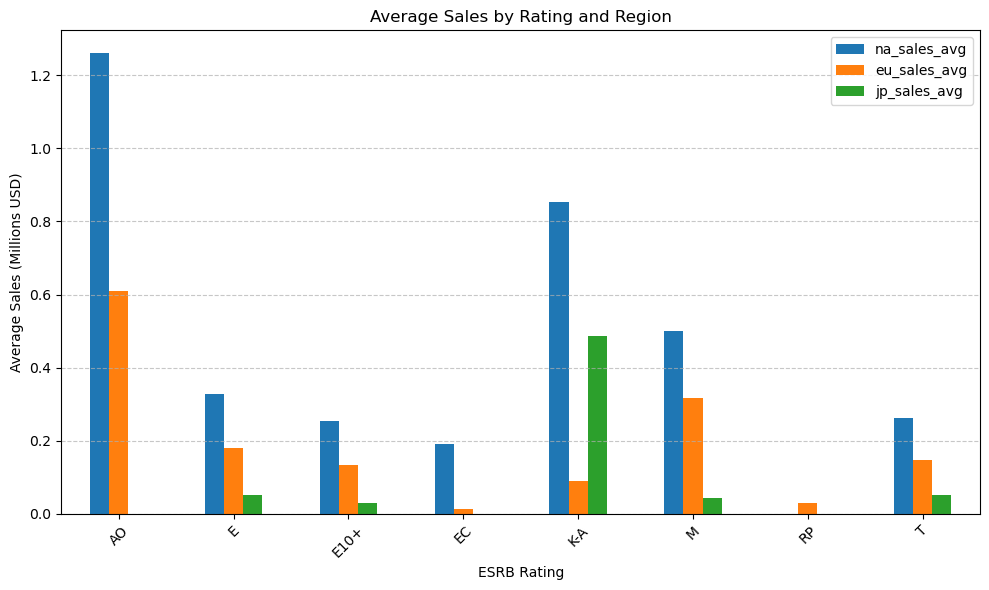

In [ ]:
plt.figure(figsize=(10, 6))
avg_by_rating_region.plot(
    kind='bar',
    x='rating',
    y=['na_sales_avg','eu_sales_avg','jp_sales_avg'],
    legend=True,
    ax=plt.gca()
)

plt.title('Average Sales by Rating and Region')      # Set the title
plt.xlabel('ESRB Rating')                            # X-axis label
plt.ylabel('Average Sales (Millions USD)')            # Y-axis label

plt.grid(axis='y', linestyle='--', alpha=0.7)         # Add y-axis gridlines
plt.xticks(rotation=45)                               # Rotate x-axis labels

plt.tight_layout()                                    # Adjust layout
plt.show()         # Display the plot

The near‐absence of “AO” titles in Japan stems from its CERO rating system, causing those releases to be down-rated or reclassified.

High-volume genres (Action and Sports) rely on E/T/K-A ratings to maximize audience reach and total sales.

Genres with higher per-title ROI (Shooter, Platform, RPG) tend to carry M/AO ratings; they release fewer games but achieve stronger average sales.

Regionally, North America and Europe show robust demand for E/T/M, while Japanese markets require CERO mapping to capture adult segments.

#

## 🧪 Test Hypotheses




### Average user ratings of the Xbox One and PC platforms are the same?


In [ ]:
pc = dataset[dataset['platform'] == 'PC'] # Filter for PC platform
xbox_one = dataset[dataset['platform'] == 'XOne'] # Filter for Xbox One platform

pc_rating = pc['user_score']
xbox_one_rating = xbox_one['user_score']

# Perform a t-test to compare the means of the two samples
sample_1 = pc_rating.dropna()  # Drop NaN values from PC ratings

sample_2 = xbox_one_rating.dropna()  # Drop NaN values from Xbox One ratings

# Assuming equal variances
# Null Hypothesis: The means of the two samples are equal
# Alternative Hypothesis: The means of the two samples are not equal



# Calculate the t-statistic and p-value
# Using a two-tailed test
# H0: μ1 = μ2 (means are equal)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



p-value:  1.3037979620149106e-05
We reject the null hypothesis


### Average user ratings for the Action and Sports genres are different?


In [135]:
action = dataset[dataset['genre'] == 'Action'] # Filter for Action genre
sports = dataset[dataset['genre'] == 'Sports'] # Filter for Adventure genre

action_rating = action['user_score']
sports_rating = sports['user_score']

# Perform a t-test to compare the means of the two samples
sample_1 = action_rating.dropna()  # Drop NaN values from PC ratings

sample_2 = sports_rating.dropna()  # Drop NaN values from Xbox One ratings

# Assuming equal variances
# Null Hypothesis: The means of the two samples are different
# Alternative Hypothesis: The means of the two samples are equal



# Calculate the t-statistic and p-value
# Using a two-tailed test
# H0: μ1 = μ2 (means are equal)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_1, sample_2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  0.06480928064420527
We can't reject the null hypothesis


## ¿How you formulated the null and alternative hypotheses?
## ¿What criteria you used to test the hypotheses and why?

For each question, we compare the average user ratings of two independent groups. We set up:

Xbox One vs. PC

Null hypothesis (H₀): The mean user rating for Xbox One games is equal to the mean user rating for PC games.

Alternative hypothesis (H₁): The mean user ratings for Xbox One and PC games are different.

Action vs. Sports

Null hypothesis (H₀): The mean user rating for Action games is equal to the mean user rating for Sports games.

Alternative hypothesis (H₁): The mean user ratings for Action and Sports games are different.

### Choosing the Test and Criteria

Test selection: We used a two-sample t-test (independent samples) because we are comparing the means of two separate groups (platforms or genres) and our sample sizes are large enough to invoke the t-test’s assumptions.

Significance level (α = 0.05): We decided in advance that we would require a p-value below 0.05 to declare a “statistically significant” difference. This 5% threshold balances the risk of false positives (claiming a difference when there isn’t one) with the need to detect true differences.

### Decision rule:

If p < 0.05 → reject H₀ (evidence of a real difference in means).

If p ≥ 0.05 → fail to reject H₀ (no strong evidence of a difference).

By applying this consistent framework to both tests, we ensure an objective standard: only very small p-values (less than 0.05) lead us to conclude that one group’s average rating truly differs from the other’s.


Xbox One vs. PC games: Players clearly rate these two platforms differently. In other words, Xbox One games and PC games don’t get the same average scores from users.

Action vs. Sports games: The average user scores for Action games and Sports games are very close. We didn’t find enough evidence to say one genre is rated higher than the other.

## 📝Step 6: General Conclusions


## ✅ Final Conclusions

The analysis of video game sales from 1996 to 2015 reveals several key findings:

- **Sales leaders**: Action and Sports games dominate total sales, driven by high volume of releases. However, genres like Shooter and RPG show higher average sales per game, indicating stronger performance per title.
- **Platform cycles**: Most platforms follow a commercial lifecycle of 6–10 years, with peaks typically occurring 5–8 years after launch.
- **Ratings impact**: ESRB ratings influence sales, with “E” and “T” games showing broad market appeal. The absence of “AO” games in Japan highlights regional classification differences (e.g., CERO).
- **User vs. critic scores**: Critic ratings show a stronger correlation with total sales than user ratings, especially on platforms like PS2.
- **Hypothesis testing**: We found significant differences in user ratings between platforms (Xbox One vs. PC), but no significant difference between the Action and Sports genres.

Overall, this project demonstrates that success in the video game market is shaped by a combination of platform timing, genre trends, user demographics, and professional reviews. A balanced strategy combining high-volume genres with high-performing niches offers the most effective path forward.
